In [1]:
##Problem:Train model for classifying images from fashon_mnist dataset

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#get the data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist_data.load_data()

In [9]:
#data attributes like shape/dim and size
print("shape of train_iamges" , train_images.shape)
print("shape of train_labels" , train_labels.shape)
print("shape of test_images" , test_images.shape)
print("shape of test_labels" , test_labels.shape)
len(train_images) , len(test_images) , len(train_labels) , len(test_labels)

shape of train_iamges (60000, 28, 28)
shape of train_labels (60000,)
shape of test_images (10000, 28, 28)
shape of test_labels (10000,)


(60000, 10000, 60000, 10000)

In [10]:
#different classes from the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

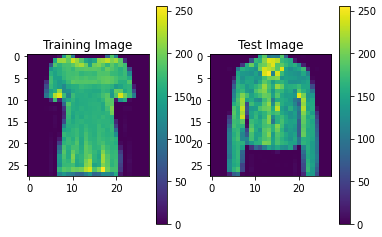

In [18]:
#take a look at training and test images
plt.figure()
plt.subplot(1,2, 1)
plt.title("Training Image")
plt.grid(False)
plt.imshow(train_images[10])
plt.colorbar()
plt.subplot(1,2, 2)
plt.title("Test Image")
plt.imshow(test_images[10])
plt.colorbar()

In [19]:
##Preprocess the data(normalized)
train_images = train_images/255.0
test_images = test_images/255.0

In [45]:
##Build the model
tf.random.set_seed(42)

#1
fashion_mnist_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

#2
fashion_mnist_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# callback  = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

#3
trainig_history = fashion_mnist_model.fit(train_images, train_labels, epochs=10)

fashion_mnist_model.save("my_fashion_mnist")

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4952 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3734 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3361 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2459 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [46]:
#evaluate the model
test_loss, test_acc = fashion_mnist_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3378 - accuracy: 0.8814


In [47]:
#making predictions
predictions = fashion_mnist_model.predict(test_images)

In [48]:
predictions.dtype ,len(predictions) , predictions.shape

(dtype('float32'), 10000, (10000, 10))

In [49]:
predictions[0]

array([1.25412868e-07, 1.23514268e-10, 9.51524655e-08, 1.23851545e-11,
       3.03616532e-09, 1.66802760e-02, 5.32663380e-09, 3.35645163e-03,
       3.81063847e-09, 9.79963005e-01], dtype=float32)

In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


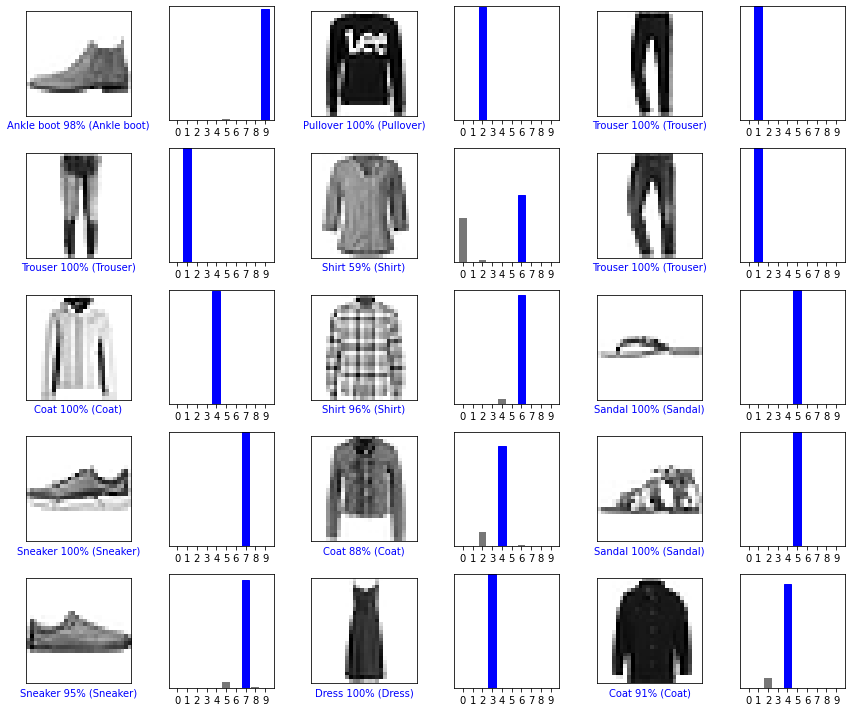

In [51]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()